In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

Load Data from CSV file


In [2]:
df= pd.read_csv(r"D:\loan\train_loan_data.csv")
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [4]:
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [5]:
 df['emp_length'].sample(10)

25839    10+ years
35119    10+ years
27850    10+ years
45957    10+ years
74513      2 years
57136          NaN
51003      7 years
28544    10+ years
72809     < 1 year
47797    10+ years
Name: emp_length, dtype: object

In [6]:
df['num_actv_bc_tl'].sample(10)

33574    7.0
77938    6.0
72574    1.0
59935    5.0
41974    4.0
35228    3.0
57466    4.0
79401    2.0
59184    3.0
16868    4.0
Name: num_actv_bc_tl, dtype: float64

In [7]:
df['mort_acc'].sample(10)

52954    2.0
15232    NaN
10835    5.0
43205    3.0
27714    0.0
65231    2.0
2283     3.0
56689    0.0
77816    3.0
46583    1.0
Name: mort_acc, dtype: float64

In [8]:
df['tot_cur_bal'].sample(10)

51096     27456.0
57046    135809.0
40297         NaN
29191     10717.0
24483    116913.0
38013    136194.0
63738     12701.0
78892    533539.0
63710    359944.0
6026      52618.0
Name: tot_cur_bal, dtype: float64

In [9]:
df['pub_rec_bankruptcies'].sample(10)

32257    0.0
54722    0.0
11568    0.0
44861    1.0
23571    0.0
70454    0.0
5848     0.0
44208    0.0
47354    0.0
45395    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [10]:
df['title'].sample(10)

9673     Credit card refinancing
31945    Credit card refinanced 
59596         Debt consolidation
36097         Debt consolidation
13112         The Consolidation 
7311     Credit card refinancing
65132         Debt consolidation
43417         Debt consolidation
74287         Debt consolidation
20942           Medical expenses
Name: title, dtype: object


To address the issue of non-finite values (such as NA or inf) in the 'emp_length' columns during encoding, we can adopt a strategy of converting them to integers. Specifically, when filling missing values with 0, the 'emp_length' columns may generate non-finite values. Therefore, we need to handle this particular scenario separately

In [11]:
df['emp_length']=df['emp_length'].replace('< 1 year', '0 years')

In [12]:
df['emp_length'].fillna('0 years', inplace=True)

In [13]:
df['emp_length']= df['emp_length'].str.extract('(\d+)').astype(float).astype(int)

Dealing with missing values (NaN)

In [14]:
df.fillna(0, inplace= True)


In [15]:
df.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000
mean,7.604614e+04,5.623037,699.987975,695.987813,13.232898,14403.867813,3.454462,1.616750,1.345991e+05,11.605675,0.216675,0.137050,1.628934e+04,51.864759,25.036875
std,6.902006e+04,3.837232,31.734840,31.734075,4.771705,8703.826298,2.342177,1.993732,1.583864e+05,5.483362,0.579854,0.383137,2.264915e+04,24.533089,12.009194
min,0.000000e+00,0.000000,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,2.000000,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.543850e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,6.000000,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,7.103850e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,10.000000,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.036260e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,10.000000,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


Data visualization and pre-processing

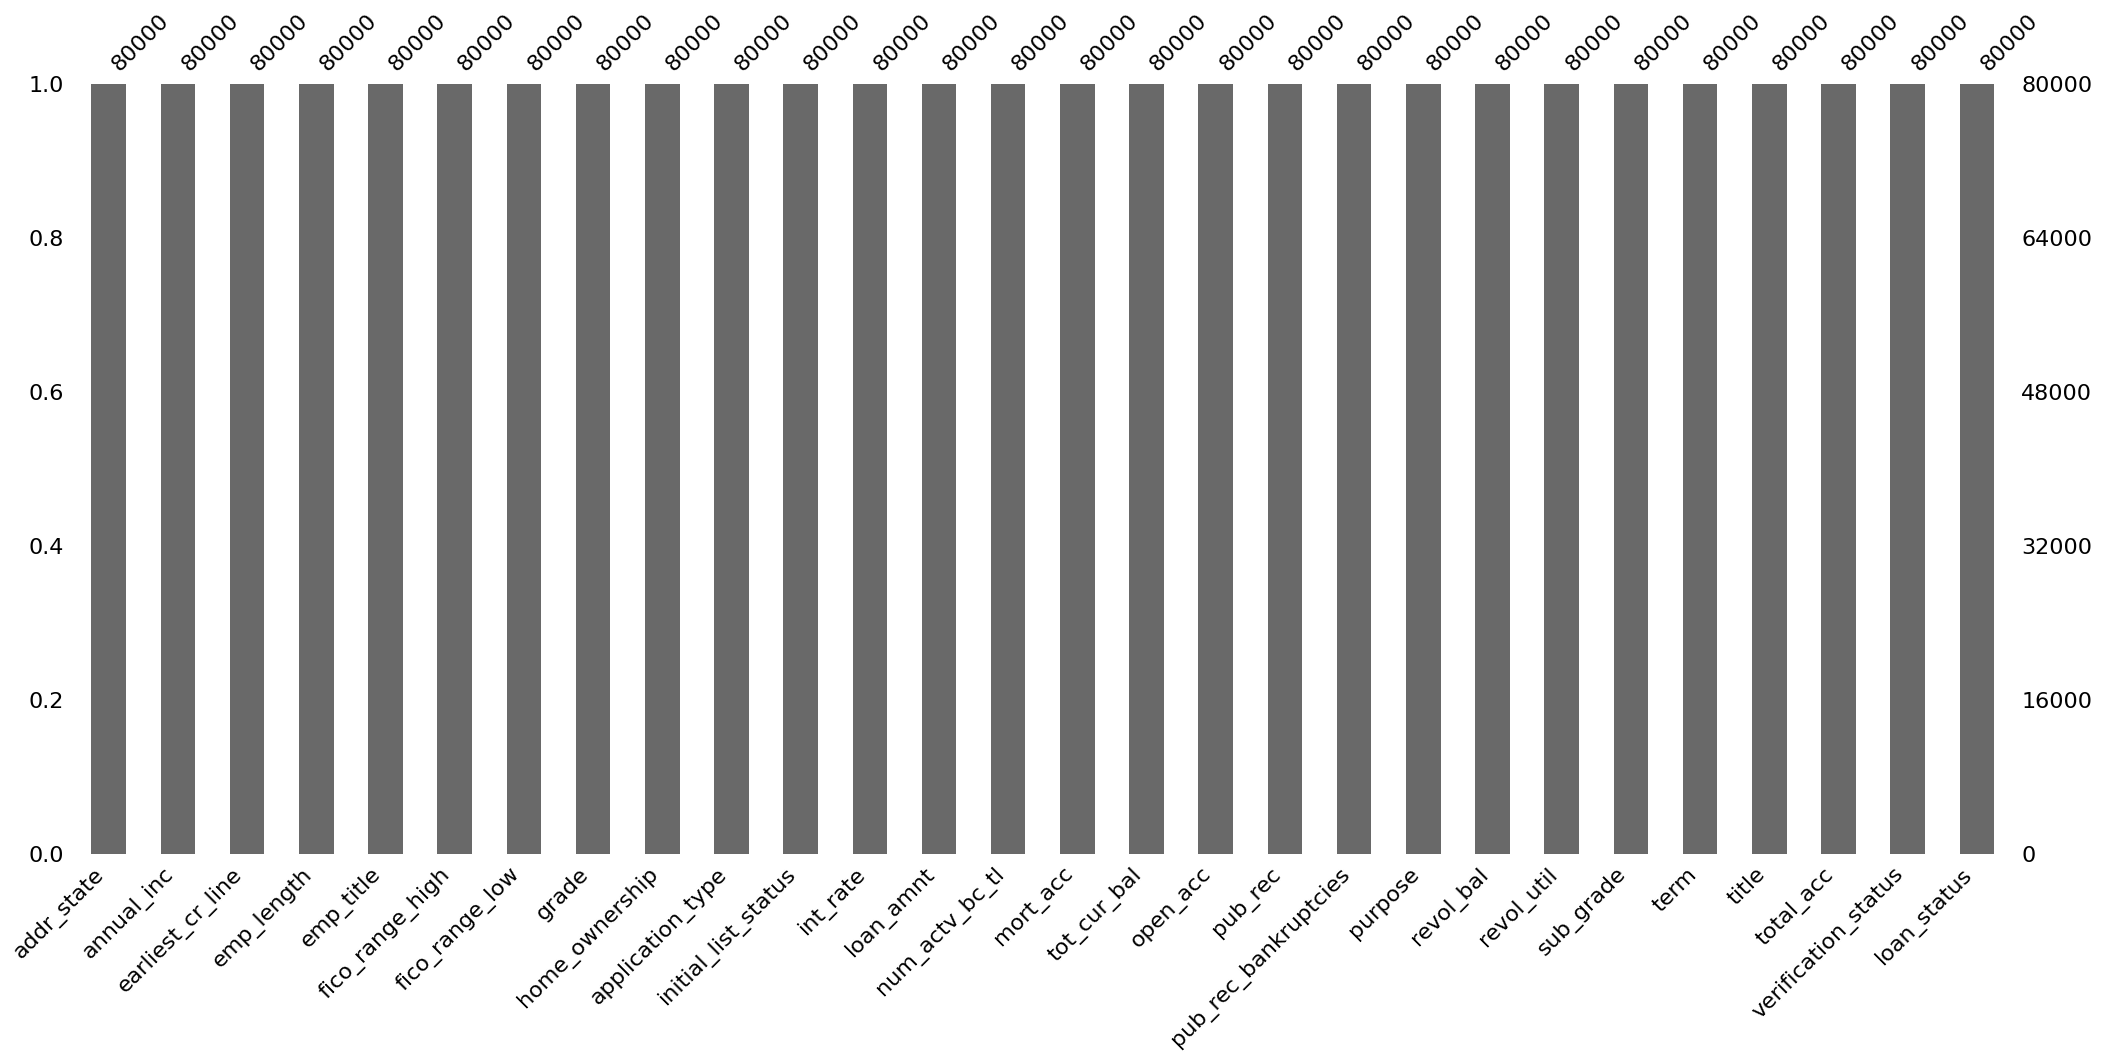

In [16]:
plt.figure(figsize=(10,8))
msno.bar(df)
plt.show()

In [17]:
df['loan_status'].value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

In [18]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    39628
RENT        31688
OWN          8654
ANY            19
OTHER           7
NONE            4
Name: count, dtype: int64

In [19]:
df['application_type'].value_counts()

application_type
Individual    78446
Joint App      1554
Name: count, dtype: int64

In [20]:
df['initial_list_status'].value_counts()

initial_list_status
w    46745
f    33255
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


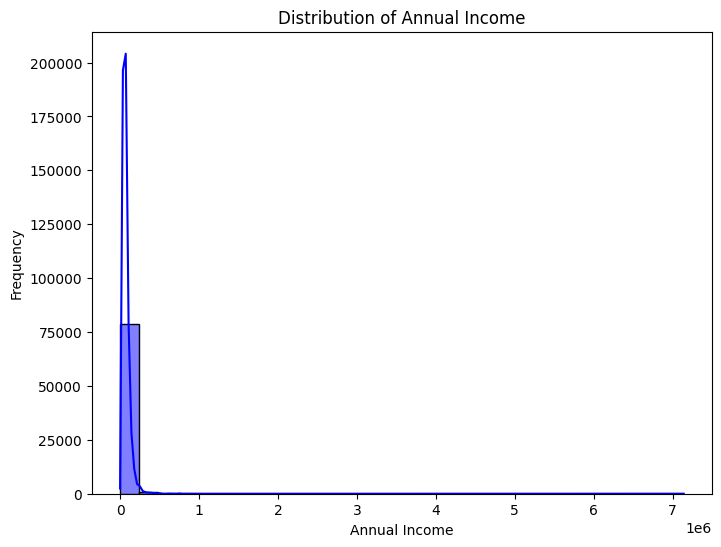

In [21]:
# Plot distribution of annual_inc
plt.figure(figsize=(8, 6))
sns.histplot(df['annual_inc'], bins=30, kde=True,  color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


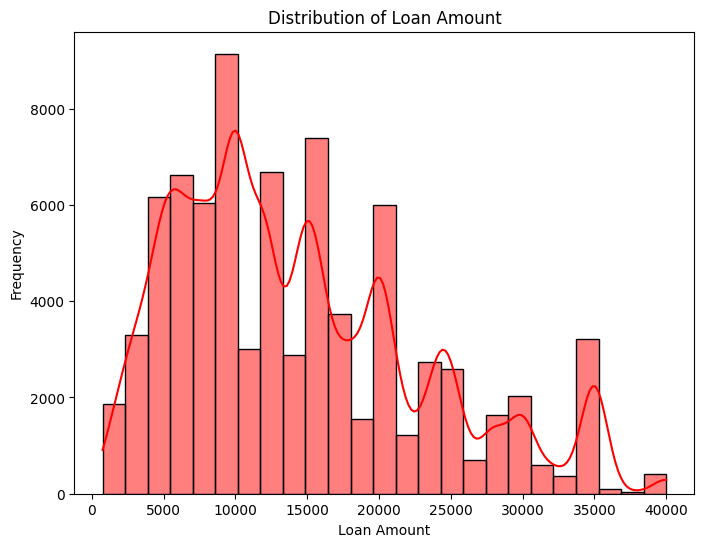

In [22]:
# Plot distribution of loan_amnt
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amnt'], bins=25, kde=True, color='red')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

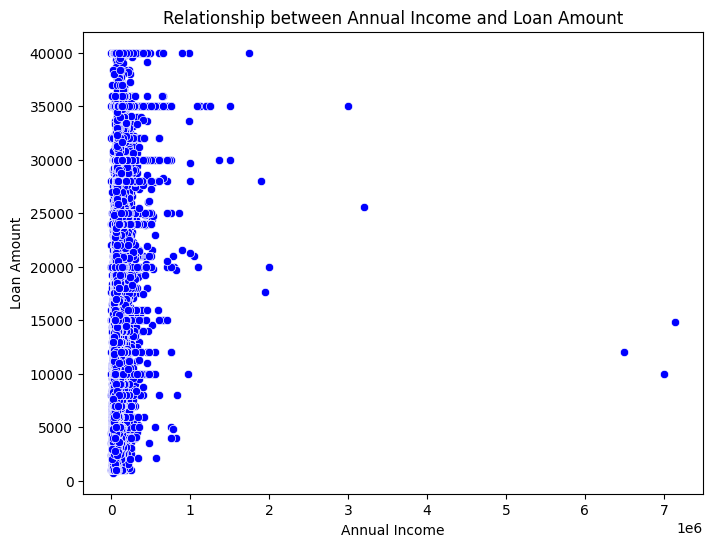

In [23]:
# Plot relationship between annual_inc and loan_amnt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df, color='blue')
plt.title('Relationship between Annual Income and Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


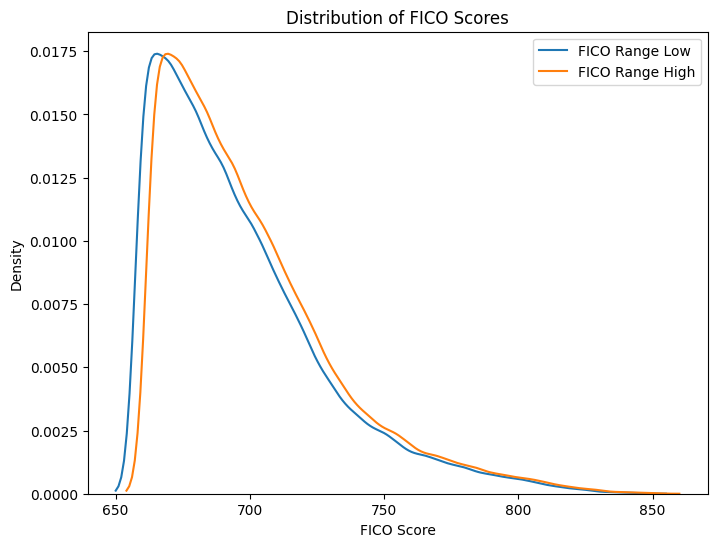

In [24]:
# Plot distribution of FICO scores
plt.figure(figsize=(8, 6))
sns.kdeplot(df['fico_range_low'], label='FICO Range Low')
sns.kdeplot(df['fico_range_high'], label='FICO Range High' )
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Density')
plt.legend()
plt.show()

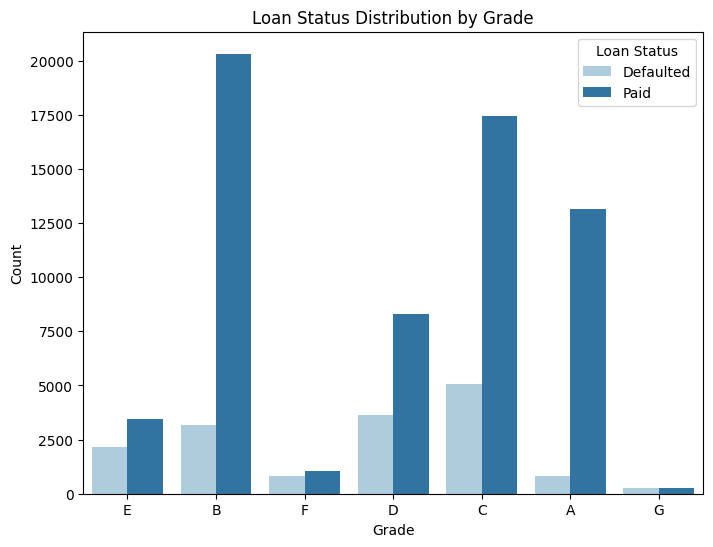

In [25]:
# Plot loan status distribution by grade
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='grade', hue='loan_status', palette='Paired')
plt.title('Loan Status Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

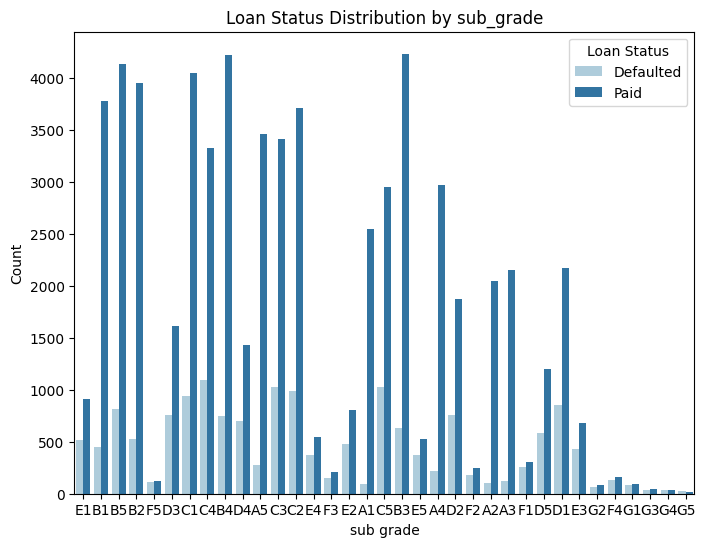

In [26]:
# Plot loan status distribution by subgrade
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sub_grade', hue='loan_status', palette='Paired')
plt.title('Loan Status Distribution by sub_grade')
plt.xlabel('sub grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

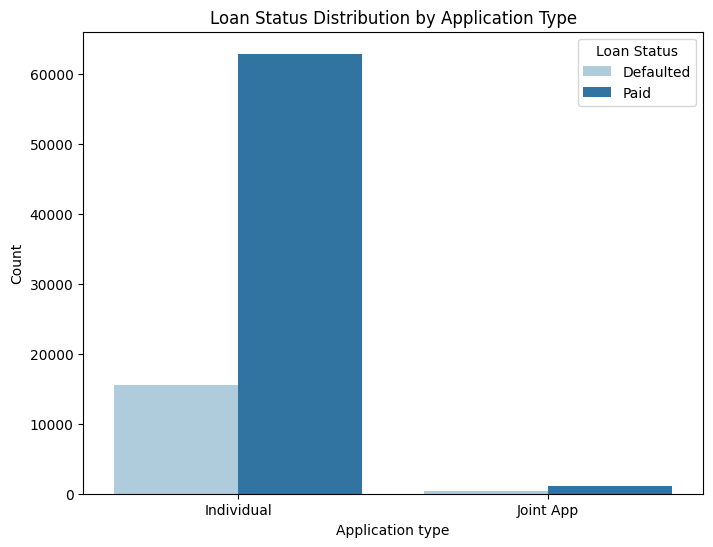

In [27]:
# Plot loan status distribution by Application type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='application_type', hue='loan_status', palette='Paired')
plt.title('Loan Status Distribution by Application Type')
plt.xlabel('Application type')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

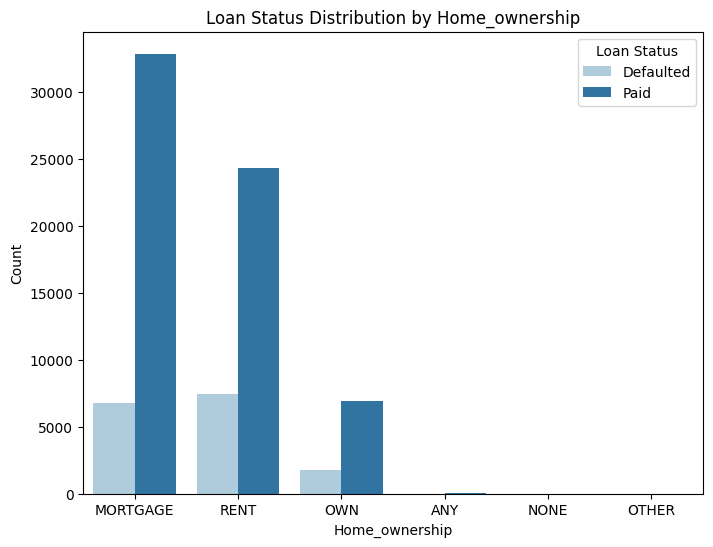

In [28]:
# Plot loan status distribution by home ownership
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='home_ownership', hue='loan_status', palette='Paired')
plt.title('Loan Status Distribution by Home_ownership')
plt.xlabel('Home_ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

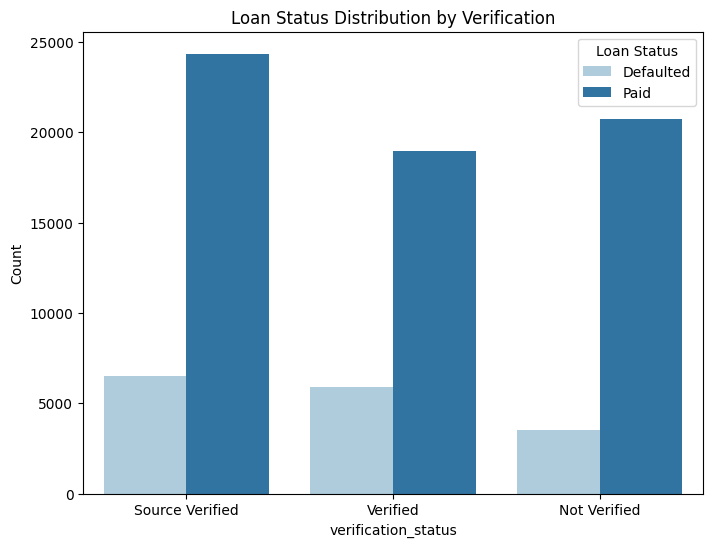

In [29]:
# Plot loan status distribution by cerification
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='Paired')
plt.title('Loan Status Distribution by Verification')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

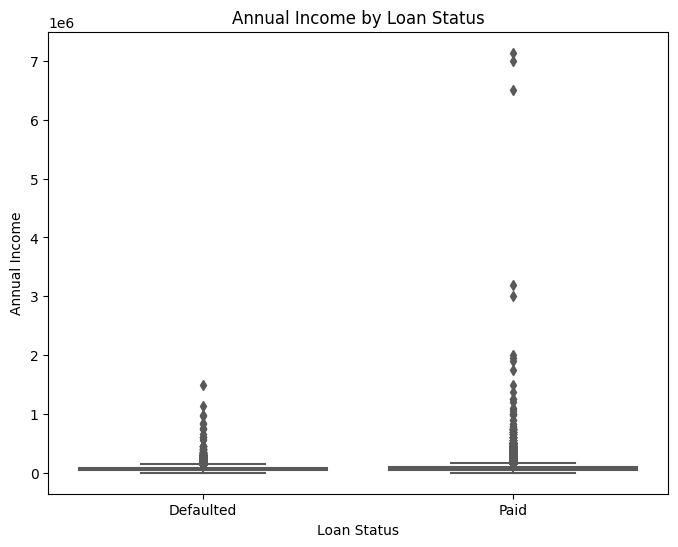

In [30]:
# Plot boxplot for annual_inc by loan_status
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_status'], y=df['annual_inc'], palette='Set2')
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

In [31]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])


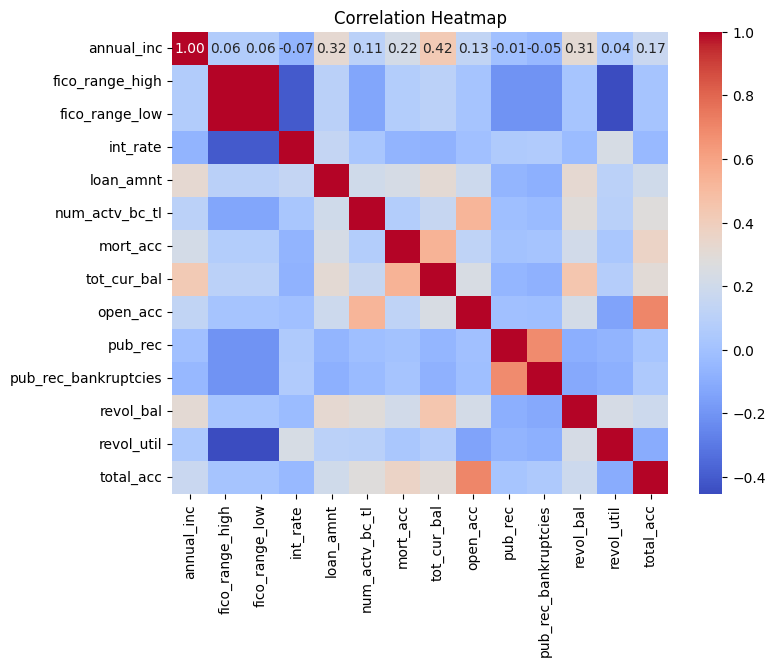

In [83]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Convert to date time object

In [33]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%y')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   addr_state            80000 non-null  object        
 1   annual_inc            80000 non-null  float64       
 2   earliest_cr_line      80000 non-null  datetime64[ns]
 3   emp_length            80000 non-null  int32         
 4   emp_title             80000 non-null  object        
 5   fico_range_high       80000 non-null  int64         
 6   fico_range_low        80000 non-null  int64         
 7   grade                 80000 non-null  object        
 8   home_ownership        80000 non-null  object        
 9   application_type      80000 non-null  object        
 10  initial_list_status   80000 non-null  object        
 11  int_rate              80000 non-null  float64       
 12  loan_amnt             80000 non-null  int64         
 13  num_actv_bc_tl  

In [35]:
df['term'] = df['term'].str.extract('(\d+)').astype(int)

Convert Categorical features to numerical values and encoding them

In [36]:
#Separating numerical and categorical data
def data_type(dataset):
        numerical=[]
        categorical=[]
        for i in dataset.columns:
            if dataset[i].dtype =='int64' or dataset[i].dtype=='float64':
                numerical.append(i)
            else:
                categorical.append(i)
        return numerical,categorical

numerical, categorical= data_type(df)

#Encoding
def encoding(df, categorical):
        for i in categorical:
            df[i] = df[i].astype('category')
            df[i] = df[i].cat.codes
        return df

df= encoding(df, categorical)

In [37]:
df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,85000.0,341,10,7927,744,740,4,1,0,...,0.0,2,5338,93.6,20,1,1503,8,1,0
1,4,40000.0,218,10,7873,724,720,1,5,0,...,0.0,2,19944,60.3,5,0,1083,12,2,1
2,9,60000.0,462,10,17128,679,675,1,1,0,...,0.0,2,23199,88.5,9,0,1503,16,1,1
3,14,100742.0,139,10,35121,664,660,1,1,0,...,0.0,2,18425,69.0,6,0,1503,19,1,1
4,20,80000.0,365,10,26488,669,665,5,5,0,...,0.0,2,34370,90.0,29,1,1290,59,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,40,81000.0,372,10,26640,664,660,6,1,0,...,0.0,2,20201,93.5,32,1,1503,42,2,0
79996,30,45000.0,318,10,31195,684,680,2,1,0,...,0.0,2,6145,56.9,10,0,1503,14,0,1
79997,34,90000.0,434,0,21747,724,720,1,4,0,...,0.0,2,3910,25.6,8,0,1503,26,1,1
79998,43,94000.0,278,3,27008,669,665,3,1,0,...,1.0,1,11897,49.4,19,1,1140,48,1,1


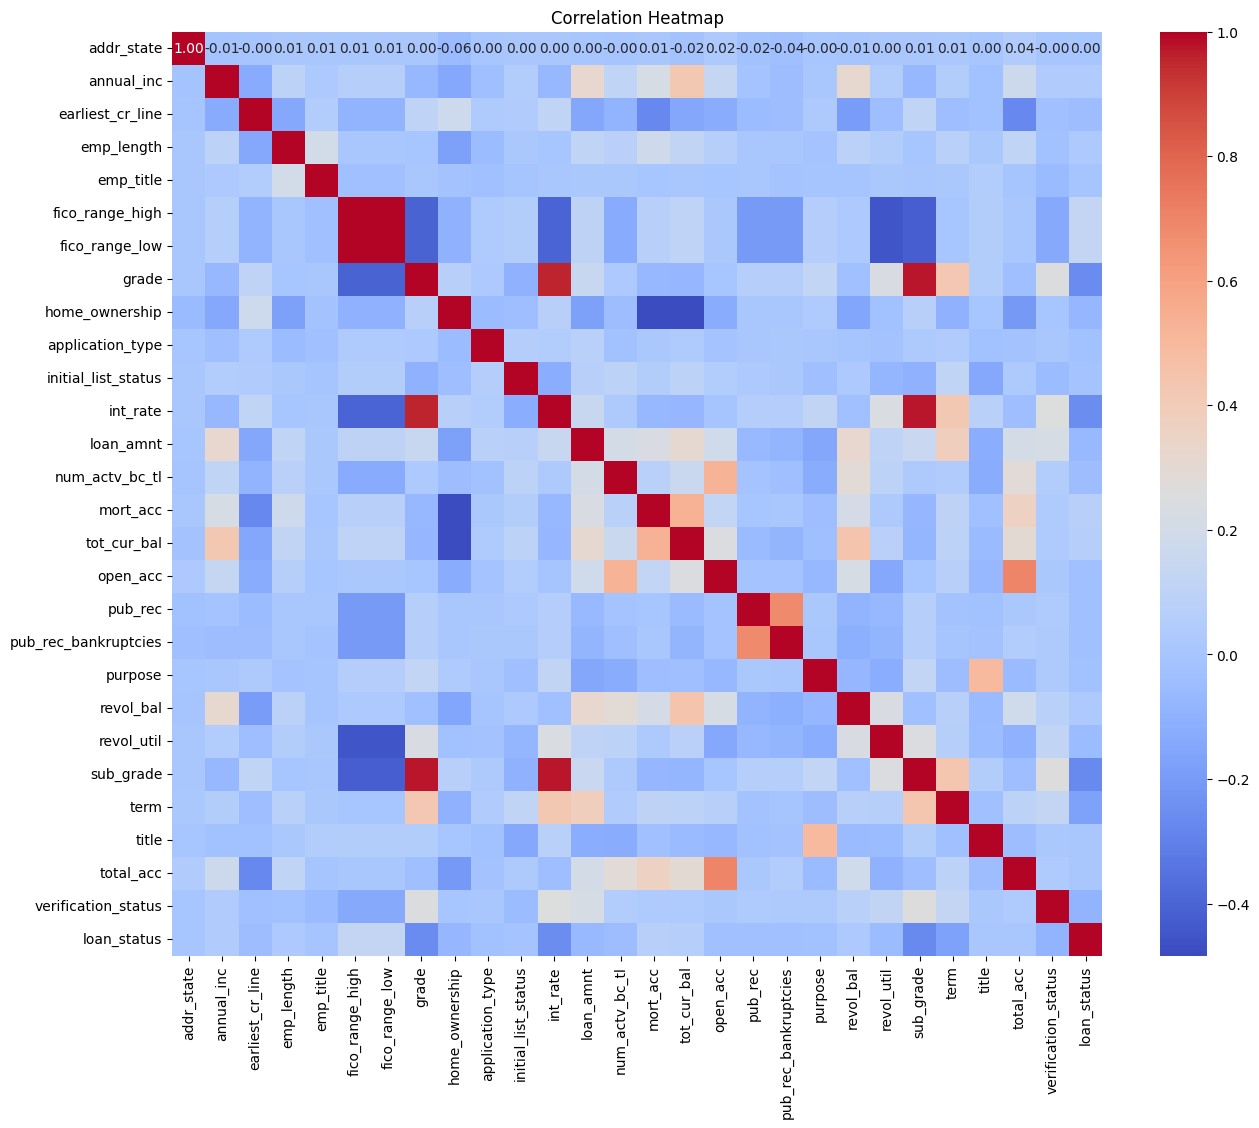

In [38]:
plt.figure(figsize=(15, 12))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Feature selection

In [39]:
columns_to_drop=['addr_state', 'emp_title','initial_list_status','purpose','title']

In [40]:
df.drop(columns=columns_to_drop, inplace=True)


In [41]:
df


,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,int_rate,loan_amnt,...,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,85000.0,341,10,744,740,4,1,0,18.99,18075,...,7,0,0.0,5338,93.6,20,1,8,1,0
1,40000.0,218,10,724,720,1,5,0,10.16,8800,...,5,0,0.0,19944,60.3,5,0,12,2,1
2,60000.0,462,10,679,675,1,1,0,11.47,18000,...,7,0,0.0,23199,88.5,9,0,16,1,1
3,100742.0,139,10,664,660,1,1,0,9.16,20000,...,12,0,0.0,18425,69.0,6,0,19,1,1
4,80000.0,365,10,669,665,5,5,0,23.83,35000,...,23,0,0.0,34370,90.0,29,1,59,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,372,10,664,660,6,1,0,25.89,25850,...,12,0,0.0,20201,93.5,32,1,42,2,0
79996,45000.0,318,10,684,680,2,1,0,12.29,6975,...,7,0,0.0,6145,56.9,10,0,14,0,1
79997,90000.0,434,0,724,720,1,4,0,10.99,7000,...,9,0,0.0,3910,25.6,8,0,26,1,1
79998,94000.0,278,3,669,665,3,1,0,19.47,18000,...,16,1,1.0,11897,49.4,19,1,48,1,1


Loan Status
0= default
1= paid

In [42]:
X=df.drop(columns='loan_status')


Normalize Data

In [43]:
X=StandardScaler().fit_transform(X)
X

array([[ 1.29729146e-01, -2.43121131e-01,  1.14066348e+00, ...,
         1.77646958e+00, -1.41866151e+00, -9.68109270e-03],
       [-5.22259338e-01, -1.61507045e+00,  1.14066348e+00, ...,
        -5.62914228e-01, -1.08558129e+00,  1.26624546e+00],
       [-2.32486679e-01,  1.10652007e+00,  1.14066348e+00, ...,
        -5.62914228e-01, -7.52501076e-01, -9.68109270e-03],
       ...,
       [ 2.02172311e-01,  7.94206403e-01, -1.46539832e+00, ...,
        -5.62914228e-01,  8.01994715e-02, -9.68109270e-03],
       [ 2.60126843e-01, -9.45826880e-01, -6.83579782e-01, ...,
         1.77646958e+00,  1.91214068e+00, -9.68109270e-03],
       [ 1.48356916e+01,  1.34222375e-02, -9.44185962e-01, ...,
        -5.62914228e-01,  5.79819800e-01, -9.68109270e-03]])

In [44]:
y=df['loan_status']
y

0        0
1        1
2        1
3        1
4        1
        ..
79995    0
79996    1
79997    1
79998    1
79999    1
Name: loan_status, Length: 80000, dtype: int8

Splitting the dataset into test set and train set

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)


***Classification***

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:
**Decision Tree**
**Logistic Regression**
**Random Forest**

***Decision Tree***

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
#Prediction
y_dt = classifier_dt.predict(X_test)
#Accuracy Score and Confusion matrix visualization
accuracy_dt = accuracy_score(y_dt,y_test)
confusion_dt = confusion_matrix(y_dt,y_test)
print('Accuracy Score= ',accuracy_dt)
print('confusion_matrix= \n',confusion_dt)

Accuracy Score=  0.7013
confusion_matrix= 
 [[ 1156  3185]
 [ 2789 12870]]


In [48]:
#cross value score
cv_scores_dt = cross_val_score(classifier_dt, X_train, y_train, cv=5)

In [49]:
print("Cross-validation scores:", cv_scores_dt)
print("Mean CV Score:", cv_scores_dt.mean())
print("Standard Deviation of CV Scores:", cv_scores_dt.std())


Cross-validation scores: [0.70008333 0.7005     0.70491667 0.701      0.69758333]
Mean CV Score: 0.7008166666666666
Standard Deviation of CV Scores: 0.0023637305731030733


***Logistic Regression***

In [50]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [51]:
#Predictions
y_lr = classifier_lr.predict(X_test)
#Accuracy score and confusion matrix visualization
accuracy_lr = accuracy_score(y_lr,y_test)
confusion_lr = confusion_matrix(y_lr,y_test)
print('Accuracy Score= ',accuracy_lr)
print('confusion_matrix= \n',confusion_lr)

Accuracy Score=  0.80255
confusion_matrix= 
 [[  276   280]
 [ 3669 15775]]


In [52]:
#cross value score
cv_scores_lr = cross_val_score(classifier_lr, X_train, y_train, cv=5)


In [53]:
print("Cross-validation scores:", cv_scores_lr)
print("Mean CV Score:", cv_scores_lr.mean())
print("Standard Deviation of CV Scores:", cv_scores_lr.std())


Cross-validation scores: [0.79791667 0.801      0.80008333 0.80175    0.79691667]
Mean CV Score: 0.7995333333333334
Standard Deviation of CV Scores: 0.0018345450541089117


**Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
#Predictions
y_rf = classifier_rf.predict(X_test)

#Accuracy score and confusion matrix visualization
accuracy_rf = accuracy_score(y_rf,y_test)
confusion_rf = confusion_matrix(y_rf,y_test)
print('Accuracy Score= ',accuracy_rf)
print('confusion_matrix= \n',confusion_rf)

Accuracy Score=  0.8028
confusion_matrix= 
 [[  271   270]
 [ 3674 15785]]


In [56]:
#cross value score
cv_scores_rf = cross_val_score(classifier_rf, X_train, y_train, cv=5)

In [57]:
print("Cross-validation scores:", cv_scores_rf)
print("Mean CV Score:", cv_scores_rf.mean())
print("Standard Deviation of CV Scores:", cv_scores_rf.std())


Cross-validation scores: [0.798      0.80066667 0.8        0.799      0.79583333]
Mean CV Score: 0.7987
Standard Deviation of CV Scores: 0.00169443533695186


Model Evaluation using Test set

In [58]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Load Test set for evaluation

In [59]:
df_test= pd.read_csv(r'D:\loan\test_loan_data.csv')
df_test.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


**Feature Selction**

In [60]:
columns_to_drop1=['addr_state', 'emp_title','initial_list_status','purpose','title']

In [61]:
df_test.drop(columns=columns_to_drop1, inplace=True)

In [62]:
df_test.isnull().sum()

annual_inc                 0
earliest_cr_line           0
emp_length              1258
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
total_acc                  0
verification_status        0
dtype: int64

In [63]:
df_test['emp_length']=df_test['emp_length'].replace('< 1 year', '0 years')

In [64]:
df_test['emp_length'].fillna('0 years', inplace=True)

In [65]:
df_test['emp_length']= df_test['emp_length'].str.extract('(\d+)').astype(float).astype(int)

In [66]:
#Treating the missing values
df_test.fillna(0, inplace= True)

In [67]:
df_test.isnull().sum()

annual_inc              0
earliest_cr_line        0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
total_acc               0
verification_status     0
dtype: int64

In [68]:
#Coverting to date time object
df_test['earliest_cr_line'] = pd.to_datetime(df_test['earliest_cr_line'], format='%b-%Y')

In [69]:
#Extracting the month  
df_test['term'] = df_test['term'].str.extract('(\d+)').astype(int)

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   annual_inc            20000 non-null  float64       
 1   earliest_cr_line      20000 non-null  datetime64[ns]
 2   emp_length            20000 non-null  int32         
 3   fico_range_high       20000 non-null  float64       
 4   fico_range_low        20000 non-null  float64       
 5   grade                 20000 non-null  object        
 6   home_ownership        20000 non-null  object        
 7   application_type      20000 non-null  object        
 8   int_rate              20000 non-null  float64       
 9   loan_amnt             20000 non-null  float64       
 10  num_actv_bc_tl        20000 non-null  float64       
 11  mort_acc              20000 non-null  float64       
 12  tot_cur_bal           20000 non-null  float64       
 13  open_acc        

In [71]:
#Convert Categorical features to numerical values and encoding them

#separating the numerical data and categoerical data
def data_type(dataset):
        numerical=[]
        categorical=[]
        for i in dataset.columns:
            if dataset[i].dtype =='int64' or dataset[i].dtype=='float64':
                numerical.append(i)
            else:
                categorical.append(i)
        return numerical,categorical

numerical, categorical= data_type(df_test)

#encoding 
def encoding(df_test, categorical):
        for i in categorical:
            df_test[i] = df_test[i].astype('category')
            df_test[i] = df_test[i].cat.codes
        return df_test

df_test= encoding(df_test, categorical)

In [72]:
df_test

,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,int_rate,loan_amnt,...,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,term,total_acc,verification_status
0,50000.0,533,1,719.0,715.0,2,2,0,13.99,5000.0,...,33395.0,9.0,0.0,0.0,2568.0,9.8,13,0,11.0,1
1,92000.0,408,10,684.0,680.0,1,3,0,10.99,30000.0,...,229832.0,11.0,0.0,0.0,30394.0,75.4,6,0,35.0,1
2,89000.0,255,10,679.0,675.0,1,1,0,10.15,16000.0,...,181616.0,15.0,0.0,0.0,38400.0,75.3,6,1,41.0,0
3,33000.0,443,9,674.0,670.0,2,3,0,13.68,10000.0,...,30603.0,12.0,1.0,1.0,21224.0,69.4,10,0,16.0,0
4,35580.0,350,0,704.0,700.0,1,1,0,14.09,4000.0,...,124597.0,8.0,0.0,0.0,3471.0,39.4,9,0,19.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,38500.0,513,4,679.0,675.0,3,3,0,17.57,10000.0,...,30397.0,10.0,0.0,0.0,5816.0,60.0,18,0,10.0,0
19996,80000.0,372,3,674.0,670.0,3,1,0,18.92,18375.0,...,494439.0,9.0,0.0,0.0,13886.0,75.1,18,1,30.0,1
19997,95000.0,341,10,729.0,725.0,1,1,0,11.22,35000.0,...,284915.0,10.0,0.0,0.0,43166.0,60.7,9,0,29.0,1
19998,35000.0,423,10,809.0,805.0,0,1,0,7.89,5000.0,...,8205.0,9.0,0.0,0.0,1110.0,4.4,4,0,19.0,0


In [73]:
X_test1=StandardScaler().fit_transform(df_test)
X_test1

array([[-0.30926719,  1.72740271, -1.18995551, ..., -0.56125827,
        -1.15901224, -0.00344602],
       [ 0.18093561,  0.35876444,  1.14189351, ..., -0.56125827,
         0.8247061 , -0.00344602],
       [ 0.14592113, -1.31644881,  1.14189351, ...,  1.78171093,
         1.32063569, -1.27974894],
       ...,
       [ 0.2159501 , -0.37482568,  1.14189351, ..., -0.56125827,
         0.32877652, -0.00344602],
       [-0.48433962,  0.52300103,  1.14189351, ..., -0.56125827,
        -0.49777279, -1.27974894],
       [-0.53452705, -0.64855334, -1.44904984, ...,  1.78171093,
        -0.49777279,  1.2728569 ]])

In [74]:
#predicting the test data
y_dt2 = classifier_dt.predict(X_test1)
y_lr2 = classifier_lr.predict(X_test1)
y_rf2 = classifier_rf.predict(X_test1)

In [75]:
#F1_Score for all of them
score_dt = f1_score(y_test,y_dt2, average='weighted')
score_lr = f1_score(y_test,y_lr2, average='weighted')
score_rf = f1_score(y_test,y_rf2, average='weighted')



Report

In [76]:
print('Decision Tree f1-Score= ',score_dt)
print('Logistic Regression f1-Score= ',score_lr)
print('Random Forest f1-Score= ',score_rf)


Decision Tree f1-Score=  0.6749998114836561
Logistic Regression f1-Score=  0.7172000785310152
Random Forest f1-Score=  0.7139106092269655


In [77]:
#Log loss of the Logistic Regression predictions
lr_prob = classifier_lr.predict_proba(X_test1) 
log_lr = log_loss(y_test,lr_prob)
print('LR f1-Score= ',log_lr)

LR f1-Score=  0.5418039381996347
